In [1]:
from sklearn.datasets import load_boston
import pandas as pd

boston=load_boston()
boston_dt=boston.data
price=boston.target

df=pd.DataFrame(boston_dt, columns=boston.feature_names)
df['PRICE']=price

C:\Users\taeeu\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\taeeu\anaconda3\lib\site-packages\numpy\.libs\libopenblas.el2c6ple4zyw3eceviv3oxxgrn2nrfm2.gfortran-win_amd64.dll
C:\Users\taeeu\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\taeeu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetc

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
import pandas as pd
import numpy as np
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

## 변수들 사이의 선형관계를 파악하기 
- 산점도+선형회귀직선 시각화
- seaborn->regplot을 사용하면 산점도와 회귀직선을 동시에 시각화 가능
- matplotlib.pyplot의 subplots()에서 3개의 행과 4개의 열을 가지도록 설정
- constrained_layout=True : 그래프 사이의 적절한 가격을 자동으로 설정

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='ZN', ylabel='PRICE'>

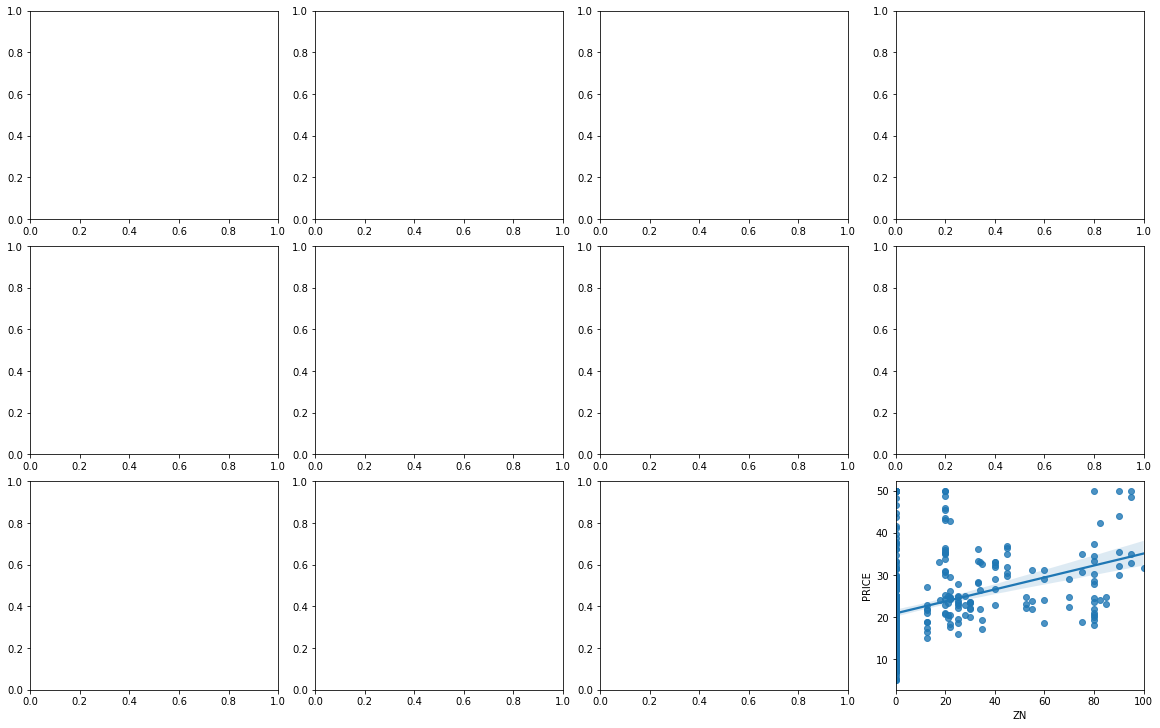

In [6]:
fig, axs=plt.subplots(figsize=(16,10), ncols=4, nrows=3, constrained_layout=True)
features=df.columns.difference(['PRICE', 'CHAS'])
#range함수는 0-11까지ㅡ이 숫자, features:컬럼명
for i, feature in zip(range(12), features):
    row=int(i/4)
    col=i%4
sns.regplot(x=feature, y=df['PRICE'], data=df, ax=axs[row][col])

In [7]:
from sklearn.model_selection import train_test_split
x=df[['CRIM', 'ZN', 'INDUS', 'NOX','RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']].values
y=df['PRICE'].values

In [8]:
#train/test로 나누기
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [9]:
#잘나뉘어져 있는지 확인
print('학습데이터세트 PRICE 평균:', y_train.mean())
print('평가데이터세트 PRICE 평균:', y_test.mean())

학습데이터세트 PRICE 평균: 22.796534653465343
평가데이터세트 PRICE 평균: 21.488235294117644


In [10]:
#전처리
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
x_train_scaled=minmax.fit_transform(X_train)

In [11]:
#모델학습
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(x_train_scaled, y_train)

LinearRegression()

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

pred_train=linear.predict(x_train_scaled)

mae=mean_absolute_error(y_train, pred_train)
mse=mean_squared_error(y_train, pred_train)
rmse=np.sqrt(mse)
r2=r2_score(y_train, pred_train)

print('MAE: {0: .5f}'.format(mae))
print('MSE: {0: .5f}'.format(mse))
print('RMSE: {0: .5f}'.format(rmse))
print('R2: {0: .5f}'.format(r2))

MAE:  3.32616
MSE:  22.11246
RMSE:  4.70239
R2:  0.74546


In [13]:
x_test_scaled=minmax.transform(X_test)
pred=linear.predict(x_test_scaled)

In [15]:
#실제값과 예측 결과를 비교하도록 데이터프레임 저자
pred_df=pd.DataFrame(pred, columns=['pred Price'])
pred_df.head()

,pred Price
0,29.218660
1,33.551467
2,14.810658
3,25.084725
4,19.173927


In [16]:
actual=pd.DataFrame(y_test, columns=['actual Price'])
actual.head()

,actual Price
0,23.6
1,32.4
2,13.6
3,22.8
4,16.1


In [17]:
reg_result=pd.concat([actual, pred_df], axis=1)
reg_result.to_csv('reg_result.csv', index=False, encoding='utf-8-sig')
reg_result.head()

,actual Price,pred Price
0,23.6,29.218660
1,32.4,33.551467
2,13.6,14.810658
3,22.8,25.084725
4,16.1,19.173927
